# 911 Emergency Calls - Data Analysis

Dataset download link: https://www.kaggle.com/mchirico/montcoalert

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read Data From CSV File

In [2]:
df = pd.read_csv('911.csv')

### Brief Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Show dataframe

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Exploratory data analysis

#### 1. What are the top 5 zip codes for 911 calls?

In [5]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

#### 2. What are the top 5 townships (twp) for 911 calls?

In [6]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

#### 3. Take a look at the 'title' column, how many unique zip code are there? 

In [7]:
df['zip'].nunique()

204

### Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [8]:
df['Reason'] = df['title'].apply(lambda x: x[0: x.find(':')])

#### 4. What is the most common Reason for a 911 call based off of this new column?

In [9]:
df['Reason'].value_counts().head

<bound method NDFrame.head of EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64>

#### Now use seaborn to create a countplot of 911 calls by Reason.

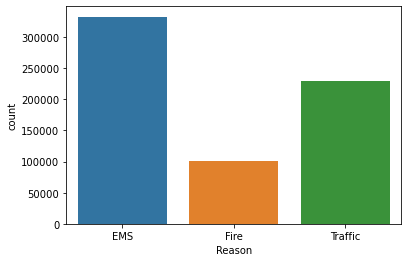

In [10]:
sns.countplot(x='Reason', data=df);

#### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [11]:
type(df['timeStamp'][0])

str

#### You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### You can now grab specific attributes from a Datetime object by calling them.

In [14]:
datetime = df['timeStamp'][0]
print(datetime)
datetime.hour

2015-12-10 17:10:52


17

#### You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [15]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

#### Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [16]:
df['Dayofweek'] = df['Dayofweek'].map(
    {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

#### Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

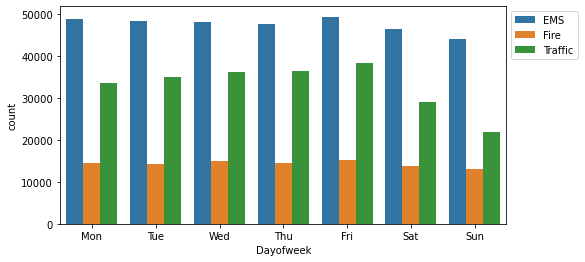

In [23]:
plt.figure(figsize=(8, 4))

sns.countplot(x='Dayofweek', data=df, 
             hue='Reason',  order=['Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']);

plt.legend(bbox_to_anchor=(1,1))

#### Now do the same for Month:

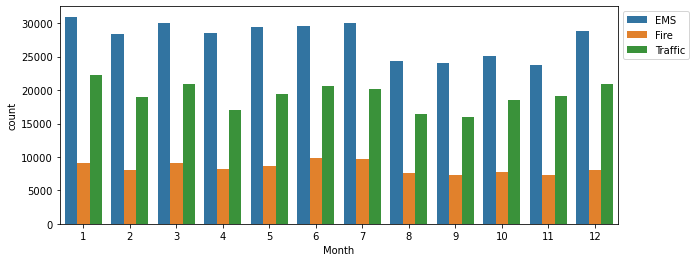

In [26]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Month', data=df, hue='Reason',);

plt.legend(bbox_to_anchor=(1,1))

#### Now create a simple plot off of the dataframe indicating the count of calls per month.

In [31]:
by_month = df.groupby('Month').count()

<AxesSubplot:xlabel='Month'>

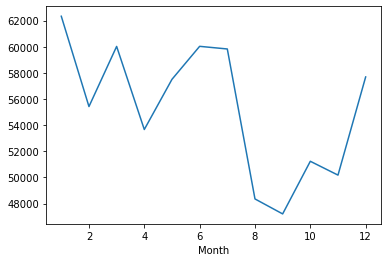

In [32]:
by_month['lat'].plot()

#### Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

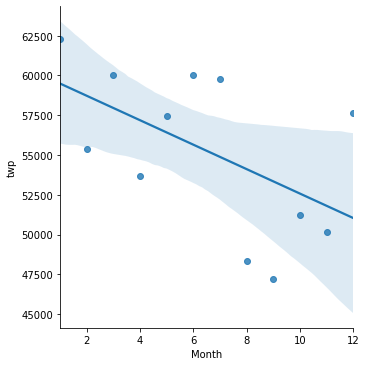

In [34]:
sns.lmplot(x='Month', y='twp', data=by_month.reset_index())

#### Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

In [39]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [40]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Dayofweek,Hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thu,16,2015-12-10


#### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [42]:
by_date = df.groupby('date').count()

In [44]:
by_date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Dayofweek,Hour
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


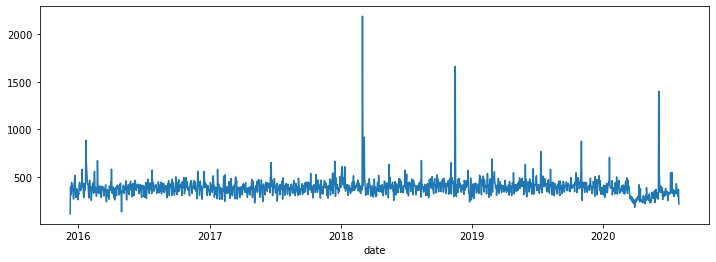

In [48]:
plt.figure(figsize=(12, 4))
by_date['lat'].plot();

#### Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

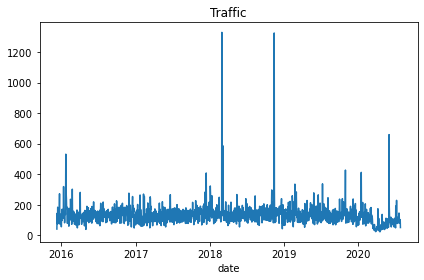

In [58]:
df[df['Reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout();

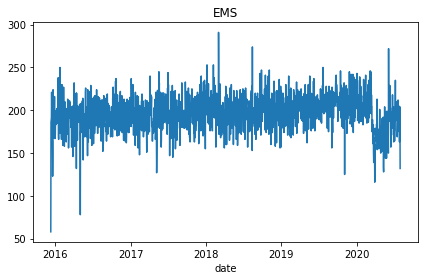

In [61]:
df[df['Reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout();

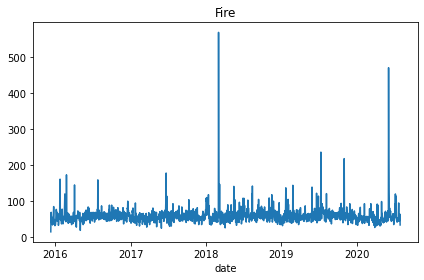

In [63]:
df[df['Reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout();

#### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [66]:
dayHour = df.groupby(['Dayofweek', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='Hour', ylabel='Dayofweek'>

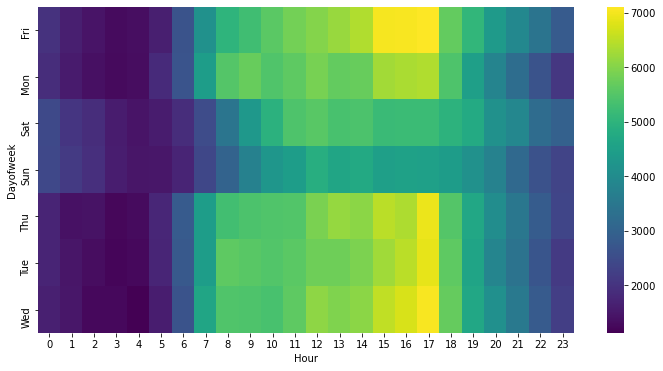

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour, cmap='viridis')

<Figure size 864x432 with 0 Axes>

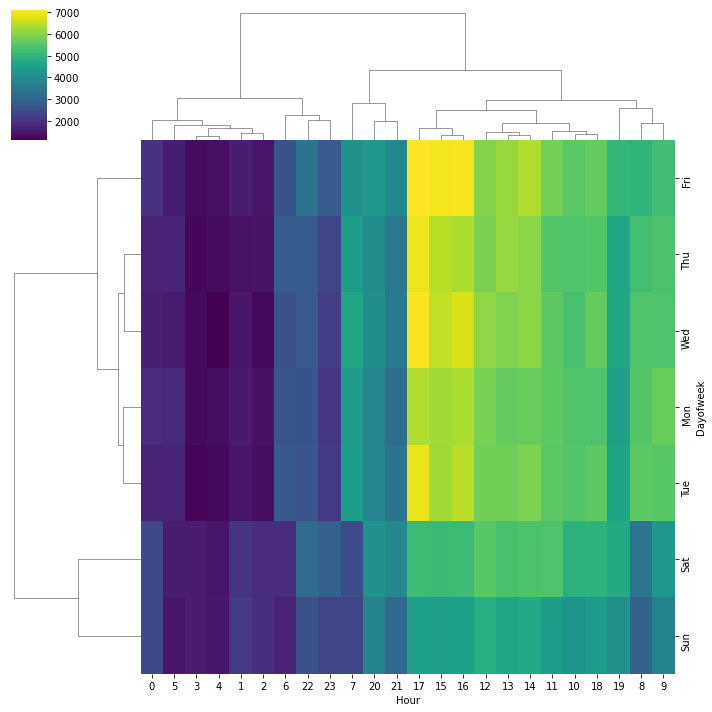

In [72]:
plt.figure(figsize=(12,6))
sns.clustermap(data=dayHour, cmap='viridis')

#### Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [73]:
dayMonth = df.groupby(['Dayofweek', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<AxesSubplot:xlabel='Month', ylabel='Dayofweek'>

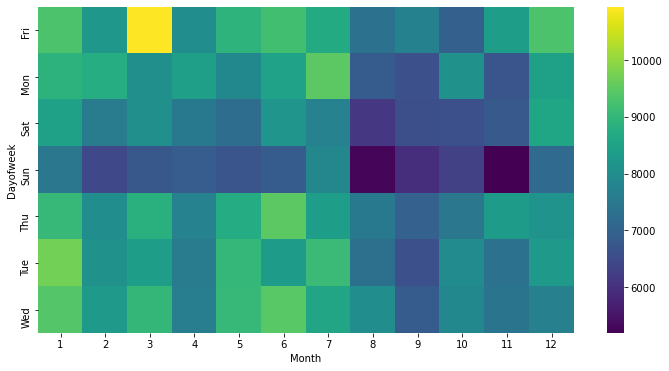

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth, cmap='viridis')

<Figure size 864x432 with 0 Axes>

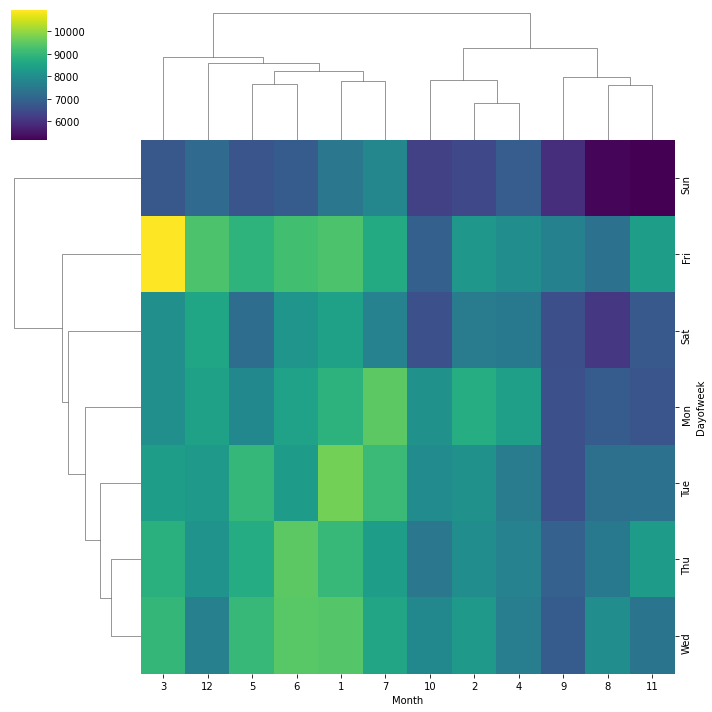

In [75]:
plt.figure(figsize=(12,6))
sns.clustermap(data=dayMonth, cmap='viridis')